#**Telecom X – Parte 2: Predicción de Cancelación/Evasión (Churn)**

##**📚 Marco teórico del proyecto**

###**📣 Historia del Proyecto**

¡Felicidades! 🎉 Has sido promovido después de tu excelente desempeño en el análisis exploratorio de la cancelación de clientes en Telecom X. Tu dedicación, claridad al comunicar los datos y visión estratégica marcaron la diferencia.

Ahora, ¡has sido invitado oficialmente a formar parte del equipo de Machine Learning de la empresa!

###**🎯 Misión**

La nueva misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelación, por lo cual, te delegan la tarea de construir un pipeline robusto para esta etapa inicial de modelado.



###**🧠 Objetivos del Proyecto**

1. Preparar los datos para el modelado (tratamiento, codificación, normalización).

2. Realizar análisis de correlación y selección de variables.

3. Entrenar dos o más modelos de clasificación.

4. Evaluar el rendimiento de los modelos con métricas.

5. Interpretar los resultados, incluyendo la importancia de las variables.

6. Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

###**🧰 Lo que se llevará a cabo**

1. ✅ Preprocesamiento de datos para Machine Learning.

2. ✅ Construcción y evaluación de modelos predictivos.

3. ✅ Interpretación de resultados y entrega de insights.

4. ✅ Comunicación técnica con enfoque estratégico.

###**🚀 Ahora eres: Analista Junior de Machine Learning**

Telecom X confía en tu entrega para dar los próximos pasos hacia una solución de inteligencia predictiva eficaz. ¡Buena suerte!

##**🛠️ Preparación de los Datos**

###**🗂️ Extracción del Archivo Tratado**

Se carga el archivo CSV que contiene los datos tratados anteriormente de Telecom X – Parte 1.

_📂 Atención: Utiliza el mismo archivo que limpiaste y organizaste en la Parte 1 del desafío Telecom X. Debe contener solo las columnas relevantes, ya con los datos corregidos y estandarizados._

In [369]:
import pandas as pd
datos_Iniciales = pd.read_csv('/content/datos_tratados_telecomXParte1.csv')
datos_Iniciales

,ID_Cliente,Evasión,Género,Adulto_Mayor,Tiene_Pareja,Dependientes,Antigüedad,Servicio_Teléfono,Líneas_Múltiples,Servicio_Internet,...,Protección_Dispositivo,Soporte_Técnico,TV_Streaming,Películas_Streaming,Contrato,Facturación_Digital,Método_Pago,Cobro_Mensual,Cobro_Total,Cobro_Diario
0,0002-ORFBO,False,femenino,False,True,True,9,True,no,dsl,...,no,si,si,no,un_ano,True,cheque_enviado,65.60,593.30,2.19
1,0003-MKNFE,False,masculino,False,False,False,9,True,si,dsl,...,no,no,no,si,mes_a_mes,False,cheque_enviado,59.90,542.40,2.00
2,0004-TLHLJ,True,masculino,False,False,False,4,True,no,fibra_optica,...,si,no,no,no,mes_a_mes,True,cheque_electronico,73.90,280.85,2.46
3,0011-IGKFF,True,masculino,True,True,False,13,True,no,fibra_optica,...,si,no,si,si,mes_a_mes,True,cheque_electronico,98.00,1237.85,3.27
4,0013-EXCHZ,True,femenino,True,True,False,3,True,no,fibra_optica,...,no,si,si,no,mes_a_mes,True,cheque_enviado,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,False,femenino,False,False,False,13,True,no,dsl,...,no,si,no,no,un_ano,False,cheque_enviado,55.15,742.90,1.84
7263,9992-RRAMN,True,masculino,False,True,False,22,True,si,fibra_optica,...,no,no,no,si,mes_a_mes,True,cheque_electronico,85.10,1873.70,2.84
7264,9992-UJOEL,False,masculino,False,False,False,2,True,no,dsl,...,no,no,no,no,mes_a_mes,True,cheque_enviado,50.30,92.75,1.68
7265,9993-LHIEB,False,masculino,False,True,True,67,True,no,dsl,...,si,si,no,si,dos_anos,False,cheque_enviado,67.85,4627.65,2.26


###**🌿 Eliminación de Columnas Irrelevantes**

Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

In [370]:
# Se realiza la revisión de las columnas que se ienen en el archivo, para así, detectar las columans que se deben de eliminar
datos_Iniciales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Cliente              7267 non-null   object 
 1   Evasión                 7267 non-null   bool   
 2   Género                  7267 non-null   object 
 3   Adulto_Mayor            7267 non-null   bool   
 4   Tiene_Pareja            7267 non-null   bool   
 5   Dependientes            7267 non-null   bool   
 6   Antigüedad              7267 non-null   int64  
 7   Servicio_Teléfono       7267 non-null   bool   
 8   Líneas_Múltiples        7267 non-null   object 
 9   Servicio_Internet       7267 non-null   object 
 10  Seguridad_En_Línea      7267 non-null   object 
 11  Respaldo_En_Línea       7267 non-null   object 
 12  Protección_Dispositivo  7267 non-null   object 
 13  Soporte_Técnico         7267 non-null   object 
 14  TV_Streaming            7267 non-null   

In [371]:
# Al revisar las columnas, se concluye que solo se eliminará la columna de ID_Cliene, debido a que afectaría el desempeño de los modelos

datos_Iniciales.drop(columns='ID_Cliente', inplace=True)
datos_Iniciales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Evasión                 7267 non-null   bool   
 1   Género                  7267 non-null   object 
 2   Adulto_Mayor            7267 non-null   bool   
 3   Tiene_Pareja            7267 non-null   bool   
 4   Dependientes            7267 non-null   bool   
 5   Antigüedad              7267 non-null   int64  
 6   Servicio_Teléfono       7267 non-null   bool   
 7   Líneas_Múltiples        7267 non-null   object 
 8   Servicio_Internet       7267 non-null   object 
 9   Seguridad_En_Línea      7267 non-null   object 
 10  Respaldo_En_Línea       7267 non-null   object 
 11  Protección_Dispositivo  7267 non-null   object 
 12  Soporte_Técnico         7267 non-null   object 
 13  TV_Streaming            7267 non-null   object 
 14  Películas_Streaming     7267 non-null   

###**🔤 Encoding**

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

In [372]:
# Se procede a transformas las variables categóricas(Dtype = object) a formato númerico

cols_categoricas = datos_Iniciales.select_dtypes(include='object').columns.tolist()

datos_Encoding = pd.get_dummies(datos_Iniciales, columns=cols_categoricas, drop_first=True)
datos_Encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 32 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Evasión                                              7267 non-null   bool   
 1   Adulto_Mayor                                         7267 non-null   bool   
 2   Tiene_Pareja                                         7267 non-null   bool   
 3   Dependientes                                         7267 non-null   bool   
 4   Antigüedad                                           7267 non-null   int64  
 5   Servicio_Teléfono                                    7267 non-null   bool   
 6   Facturación_Digital                                  7267 non-null   bool   
 7   Cobro_Mensual                                        7267 non-null   float64
 8   Cobro_Total                                          7267 non-null  

###**📊 Verificación de la Proporción de Cancelación (Churn)**

Se calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos, así como la evaluación de _si existe un desbalance entre las clases_, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.



In [373]:
# Se utiliza el comando de value_counts() para la verificación de este paso

# Conteo de cada clase
conteo = datos_Encoding['Evasión'].value_counts()
print("Conteo de clases:\n", conteo)


# Proporción (porcentaje)
proporcion = datos_Encoding['Evasión'].value_counts(normalize=True)
print("\nProporción de clases:\n", proporcion)


Conteo de clases:
 Evasión
False    5398
True     1869
Name: count, dtype: int64

Proporción de clases:
 Evasión
False    0.74281
True     0.25719
Name: proportion, dtype: float64


###**⚖️ Balanceo de Clases (paso opcional)**

Si deseas profundizar en el análisis, aplica técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.

Se realiza el balanceo de las clases, debido a que "si una clase tiene menos del 40% del total, ya se considera desbalanceado"

####**📦 Importación de las librerías necesarias**

In [374]:
# 📦 Importación de las librerías necesarias
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

####**🎯 Separación de los datos**

In [375]:
X = datos_Encoding.drop('Evasión', axis=1)
y = datos_Encoding['Evasión']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

####**🪃 Balanceo de datos por Método de Undersampling**

In [376]:
balanceo_rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = balanceo_rus.fit_resample(X_train, y_train)

print("Distribución con Undersampling:\n", y_train_under.value_counts())


Distribución con Undersampling:
 Evasión
False    1495
True     1495
Name: count, dtype: int64


####**🧬 Balanceo de datos por Método de Oversampling**

In [377]:
balanceo_ros = RandomOverSampler(random_state=42)
X_train_over, y_train_over = balanceo_ros.fit_resample(X_train, y_train)

print("Distribución con Oversampling:\n", y_train_over.value_counts())


Distribución con Oversampling:
 Evasión
False    4318
True     4318
Name: count, dtype: int64


####**🧪 Balanceo de datos por Método de SMOTE**

In [378]:
balanceo_SMOTE = SMOTE(random_state=42)
X_train_SMOTE, y_train_SMOTE = balanceo_SMOTE.fit_resample(X_train, y_train)

print("Distribución con SMOTE:\n", y_train_SMOTE.value_counts())

Distribución con SMOTE:
 Evasión
False    4318
True     4318
Name: count, dtype: int64


####**📈 Comparación de los balanceos de los datos**

In [379]:
comparacion_balanceo = pd.DataFrame({
    'Original': y_train.value_counts(),
    'Undersampling': y_train_under.value_counts(),
    'SMOTE': y_train_SMOTE.value_counts(),
    'Oversampling': y_train_over.value_counts()
})

comparacion_balanceo

,Original,Undersampling,SMOTE,Oversampling
Evasión,,,,
False,4318,1495,4318,4318
True,1495,1495,4318,4318


####**🧩 Visualización de las clases antes y después del balanceo**

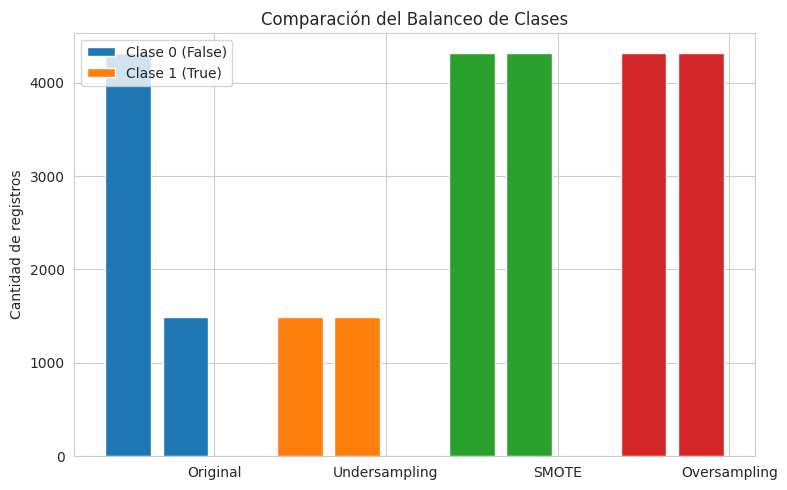

In [380]:
import matplotlib.pyplot as plt

# Conteos de clases antes y después
conteos = {
    'Original': y_train.value_counts(),
    'Undersampling': y_train_under.value_counts(),
    'SMOTE': y_train_SMOTE.value_counts(),
    'Oversampling': y_train_over.value_counts()
}

# Crear gráfico de barras
fig, ax = plt.subplots(figsize=(8, 5))

for i, (etiqueta, valores) in enumerate(conteos.items()):
    ax.bar([i*3, i*3+1], valores.values, width=0.8, label=etiqueta)

ax.set_xticks([1.5, 4.5, 7.5, 10.5])
ax.set_xticklabels(conteos.keys())
ax.set_ylabel("Cantidad de registros")
ax.set_title("Comparación del Balanceo de Clases")
ax.legend(["Clase 0 (False)", "Clase 1 (True)"])
plt.tight_layout()
plt.show()

####**🧠 Conclusiones que se pueden obtener de los datos**

A partir de la aplicación de los distintos métodos de balanceo, se obtienen las siguientes observaciones:

🔻 Undersampling: Reduce la cantidad de registros de la clase mayoritaria (False) para igualarlos con los de la clase minoritaria (True). Aunque permite un equilibrio entre clases, implica la pérdida de información útil, lo que podría afectar el rendimiento del modelo.

🔺 Oversampling: Aumenta la clase minoritaria duplicando sus registros hasta igualar el tamaño de la clase mayoritaria. Es fácil de aplicar, pero puede incrementar el riesgo de sobreajuste al repetir datos existentes.

🧬 SMOTE: Genera registros sintéticos de la clase minoritaria para mejorar la representación sin duplicar valores reales. Ofrece mayor variabilidad, lo que puede fortalecer el modelo sin provocar duplicación directa, aunque requiere mayor procesamiento.

###**📏 Normalización o Estandarización de los datos**

Se evaluó la necesidad de aplicar normalización o estandarización como parte del preprocesamiento de datos. Dado que algunos de los modelos seleccionados (como KNN, SVM, Regresión Logística y Redes Neuronales) son sensibles a la escala de las variables, se procedió a normalizar las variables numéricas utilizando StandardScaler.

Las variables normalizadas fueron:

* Antigüedad.

* Cobro_Mensual.

* Cobro_Total.

* Cobro_Diario.

Este paso se realizó sobre una copia del conjunto original (datos_scaled), para mantener la integridad de los datos no escalados y permitir el uso en modelos basados en árboles (como Decision Tree, Random Forest y XGBoost), los cuales no requieren ajuste de escala.

####**📦 Creación de una copia normalizada del DataFrame**

In [381]:
from sklearn.preprocessing import StandardScaler

# 👉 Copia del DataFrame para no modificar el original
datos_scaled = datos_Encoding.copy()

# 🔍 Columnas a escalar
cols_a_escalar = ['Antigüedad', 'Cobro_Mensual', 'Cobro_Total', 'Cobro_Diario']

# 🧪 Aplicar estandarización
scaler = StandardScaler()
datos_scaled[cols_a_escalar] = scaler.fit_transform(datos_scaled[cols_a_escalar])


##**🎯 Correlación y Selección de Variables**

###**📈 Análisis de correlación**

Se realizó un análisis de correlación entre variables numéricas mediante la matriz de Pearson. Se identificaron aquellas que presentan **mayor relación con la variable Evasión**, considerando su posible relevancia en la construcción del modelo de clasificación.

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


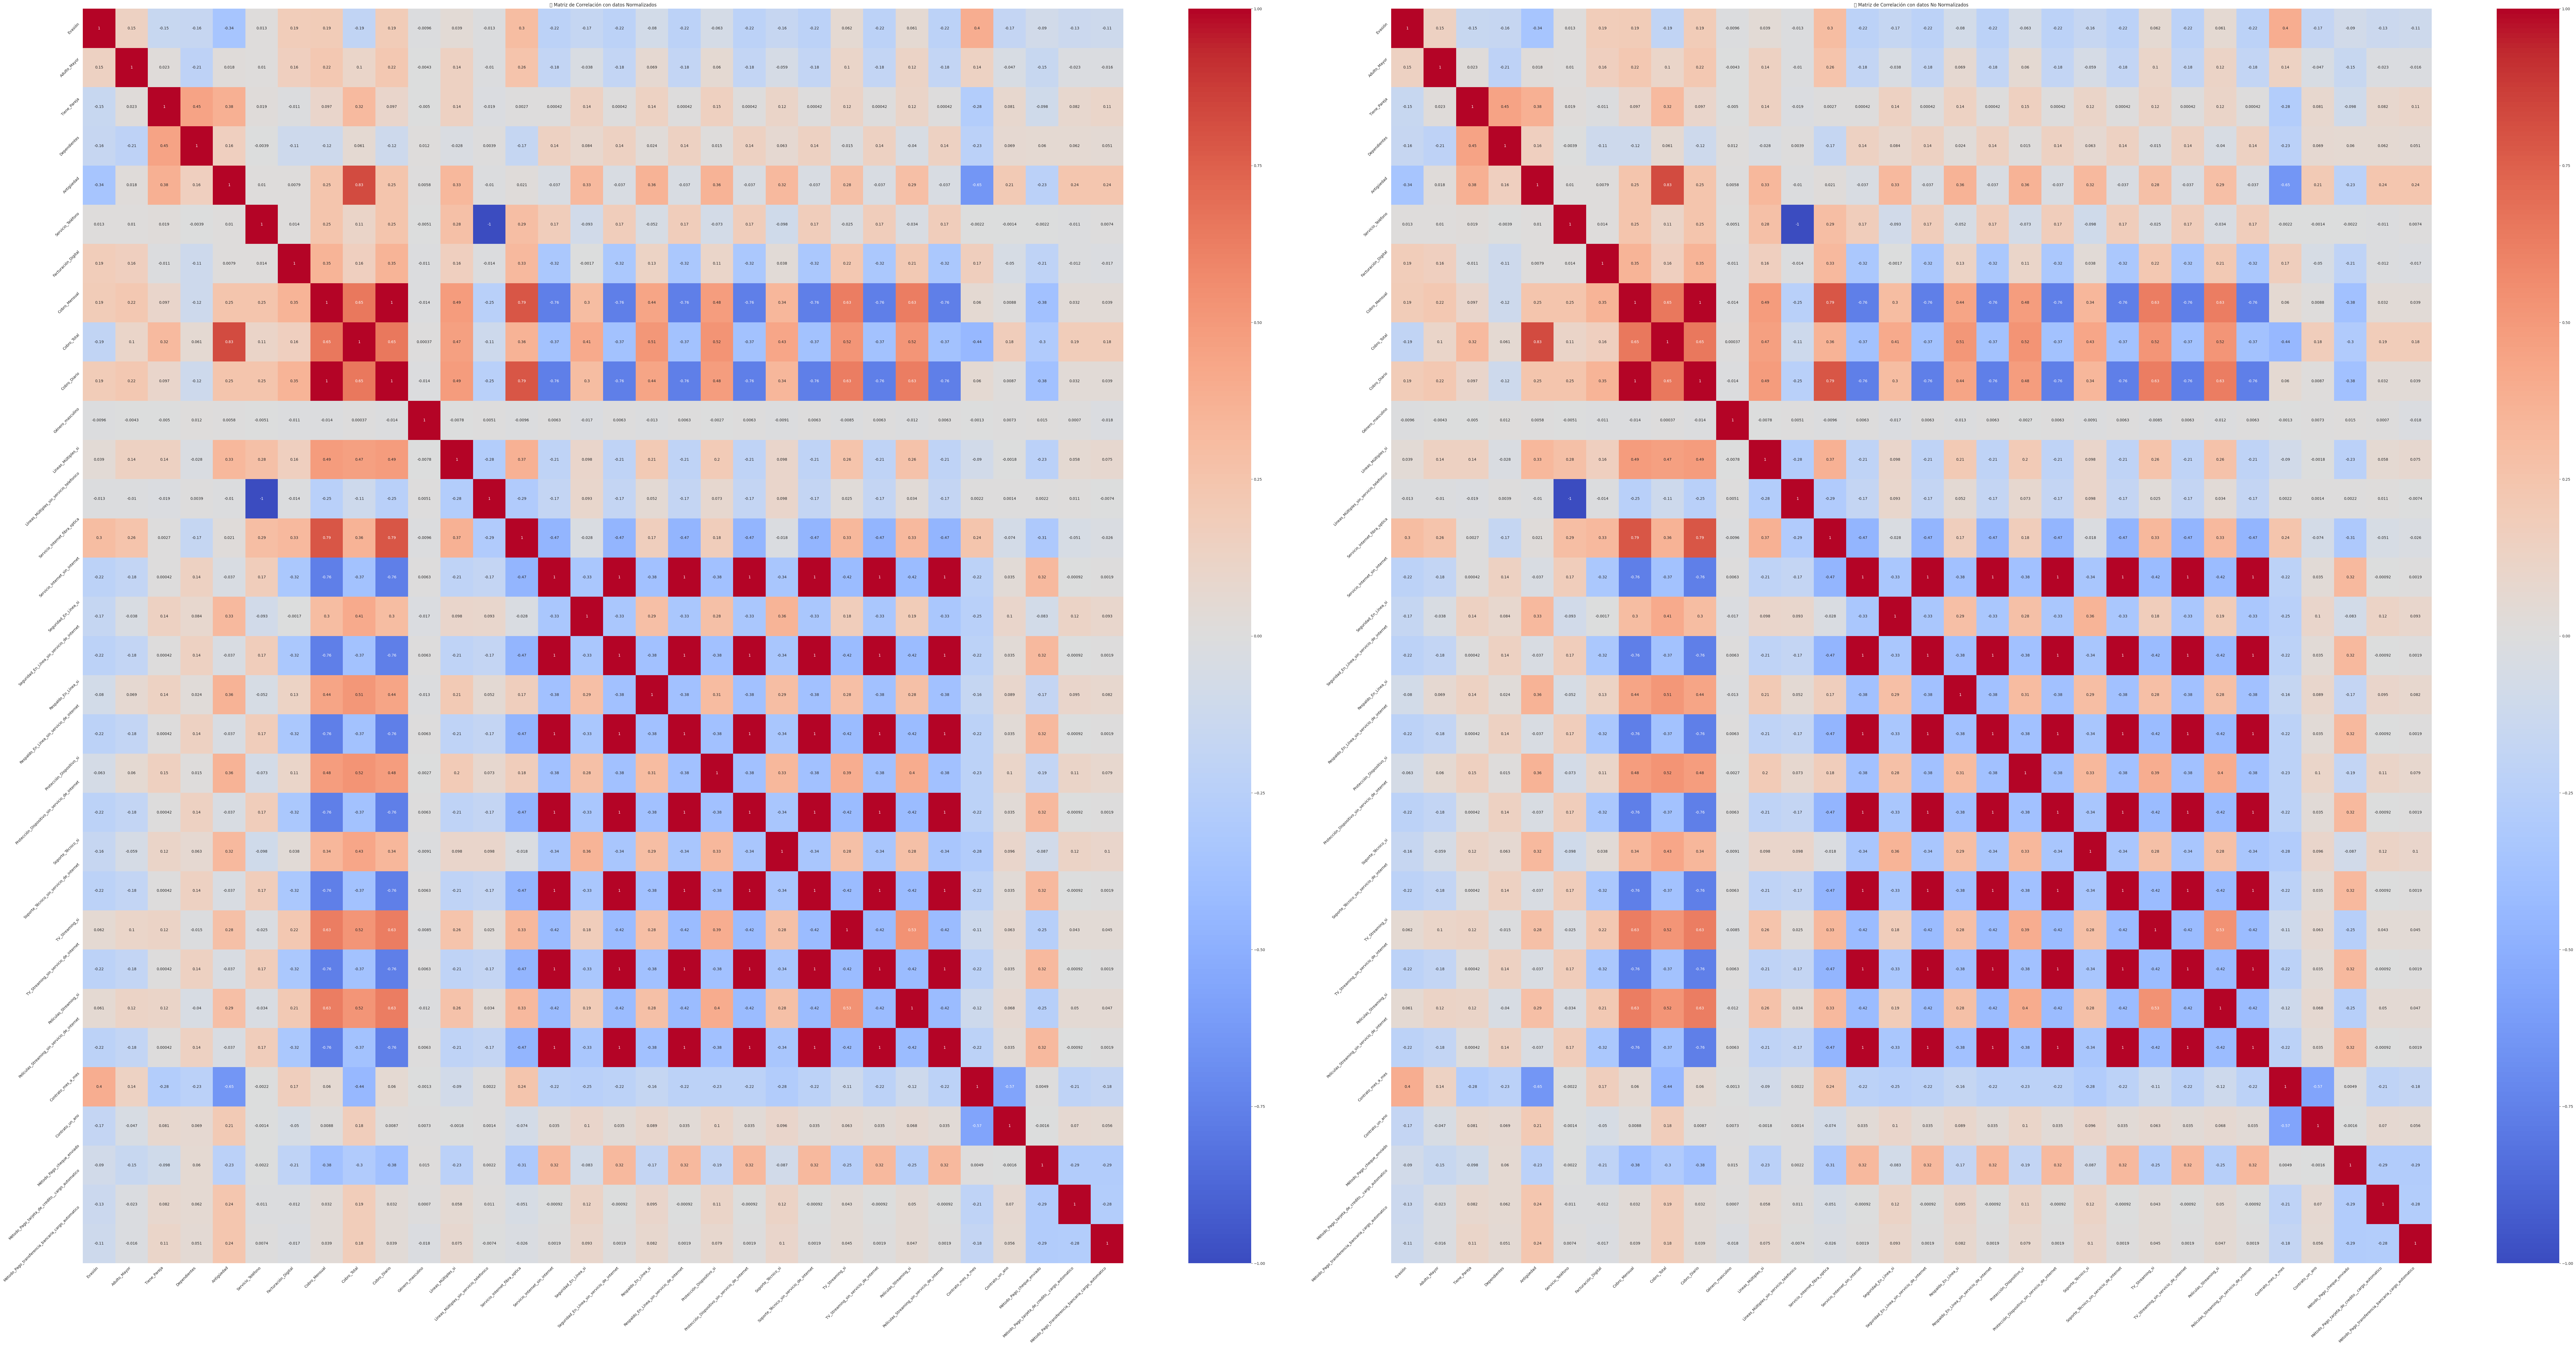

In [382]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo gráfico
sns.set_style('whitegrid')

# Creación de al figura con dos subgráficos lado a lado
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(100, 50))

# 🔹 Matriz con datos normalizados
ax[0].set_title('📊 Matriz de Correlación con datos Normalizados')
sns.heatmap(datos_scaled.corr(), annot=True, cmap='coolwarm', ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')
ax[0].set_yticklabels(ax[0].get_yticklabels(), rotation=45, ha='right')

# 🔹 Matriz con datos no normalizados
ax[1].set_title('📊 Matriz de Correlación con datos No Normalizados')
sns.heatmap(datos_Encoding.corr(), annot=True, cmap='coolwarm', ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')
ax[1].set_yticklabels(ax[1].get_yticklabels(), rotation=45, ha='right')

plt.tight_layout()


plt.show()

In [383]:
correlaciones_ev = datos_scaled.corr()['Evasión'].sort_values(ascending=False)
print("🧠 Correlación de los datos Normalizados con Evasión:\n")
print(correlaciones_ev)

🧠 Correlación de los datos Normalizados con Evasión:

Evasión                                                1.000000
Contrato_mes_a_mes                                     0.395584
Servicio_Internet_fibra_optica                         0.300949
Cobro_Diario                                           0.189918
Cobro_Mensual                                          0.189866
Facturación_Digital                                    0.186666
Adulto_Mayor                                           0.146733
TV_Streaming_si                                        0.062430
Películas_Streaming_si                                 0.060586
Líneas_Múltiples_si                                    0.039343
Servicio_Teléfono                                      0.012571
Género_masculino                                      -0.009555
Líneas_Múltiples_sin_servicio_telefonico              -0.012571
Protección_Dispositivo_si                             -0.063452
Respaldo_En_Línea_si                              

In [384]:
correlacion_ev = datos_Encoding.corr()['Evasión'].sort_values(ascending=False)
print("🧠 Correlación de los datos No Normalizados con Evasión:\n")
print(correlacion_ev)

🧠 Correlación de los datos No Normalizados con Evasión:

Evasión                                                1.000000
Contrato_mes_a_mes                                     0.395584
Servicio_Internet_fibra_optica                         0.300949
Cobro_Diario                                           0.189918
Cobro_Mensual                                          0.189866
Facturación_Digital                                    0.186666
Adulto_Mayor                                           0.146733
TV_Streaming_si                                        0.062430
Películas_Streaming_si                                 0.060586
Líneas_Múltiples_si                                    0.039343
Servicio_Teléfono                                      0.012571
Género_masculino                                      -0.009555
Líneas_Múltiples_sin_servicio_telefonico              -0.012571
Protección_Dispositivo_si                             -0.063452
Respaldo_En_Línea_si                           

####**🧠 Conclusión del Análisis de Correlación**

A partir del análisis de correlación entre las variables numéricas y la cancelación (Evasión), se identificaron algunos patrones relevantes:

Variables como Contrato_mes_a_mes (0.39) y Servicio_Internet_fibra_optica (0.30) muestran una correlación positiva significativa con la cancelación, lo que sugiere que podrían ser buenos indicadores de clientes propensos a dejar el servicio.

Por otro lado, variables como Antigüedad (-0.34), Contrato_un_ano (-0.17), y varios servicios sin conexión a internet (-0.22) muestran correlación negativa, lo cual puede reflejar perfiles más estables o menos propensos a cancelar.

Las correlaciones fueron consistentes entre la versión normalizada y la no normalizada, lo que valida la estabilidad del análisis.

Este conjunto de variables servirá como base para el siguiente paso del proyecto, donde se investigará de manera más profunda la relación entre tipo de contrato y gasto total con la cancelación, utilizando gráficos como boxplots y scatter plots para detectar patrones visuales. 🎯📊

###**🔍 Análisis Dirigido**

En esta sección se investiga la relación entre variables específicas y la cancelación (Evasión). Se analizarán casos como:

* Tiempo de contrato × Cancelación

* Gasto total × Cancelación

Para ello, se utilizarán gráficos como boxplots y scatter plots, con el fin de identificar patrones, diferencias entre clientes que cancelan o permanecen, y posibles tendencias que puedan ser útiles para el modelo predictivo.

_En esta sección, las variables fueron seleccionadas a partir de las que mostraron mayor correlación en el apartado de Análisis de Correlación de los datos No Normalizados y agrupadas según su tipo para facilitar el análisis dirigido. Se aplicaron gráficos adecuados (boxplot, scatter plot, countplot) para visualizar sus relaciones con la variable de cancelación (Evasión). Esto permitió detectar patrones que podrían ser útiles en el modelado posterior._

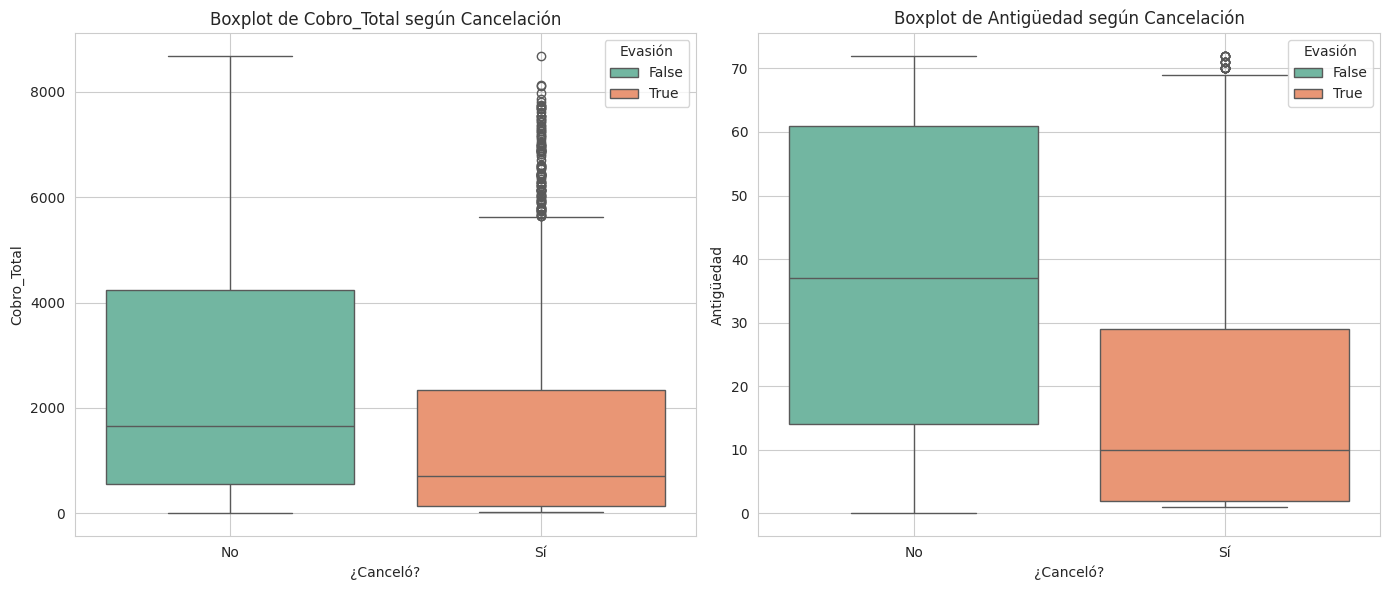

In [385]:
# Variables numéricas relevantes
variables_numericas = ['Cobro_Total', 'Antigüedad']

sns.set_style('whitegrid')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
axes = axes.flatten()

for i, var in enumerate(variables_numericas):
    sns.boxplot(x='Evasión', y=var, data=datos_Encoding, hue='Evasión', palette='Set2', ax=axes[i])
    axes[i].set_title(f"Boxplot de {var} según Cancelación")
    axes[i].set_xlabel("¿Canceló?")
    axes[i].set_ylabel(var)
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['No', 'Sí'])

    axes[i].grid(True)

plt.tight_layout()
plt.show()

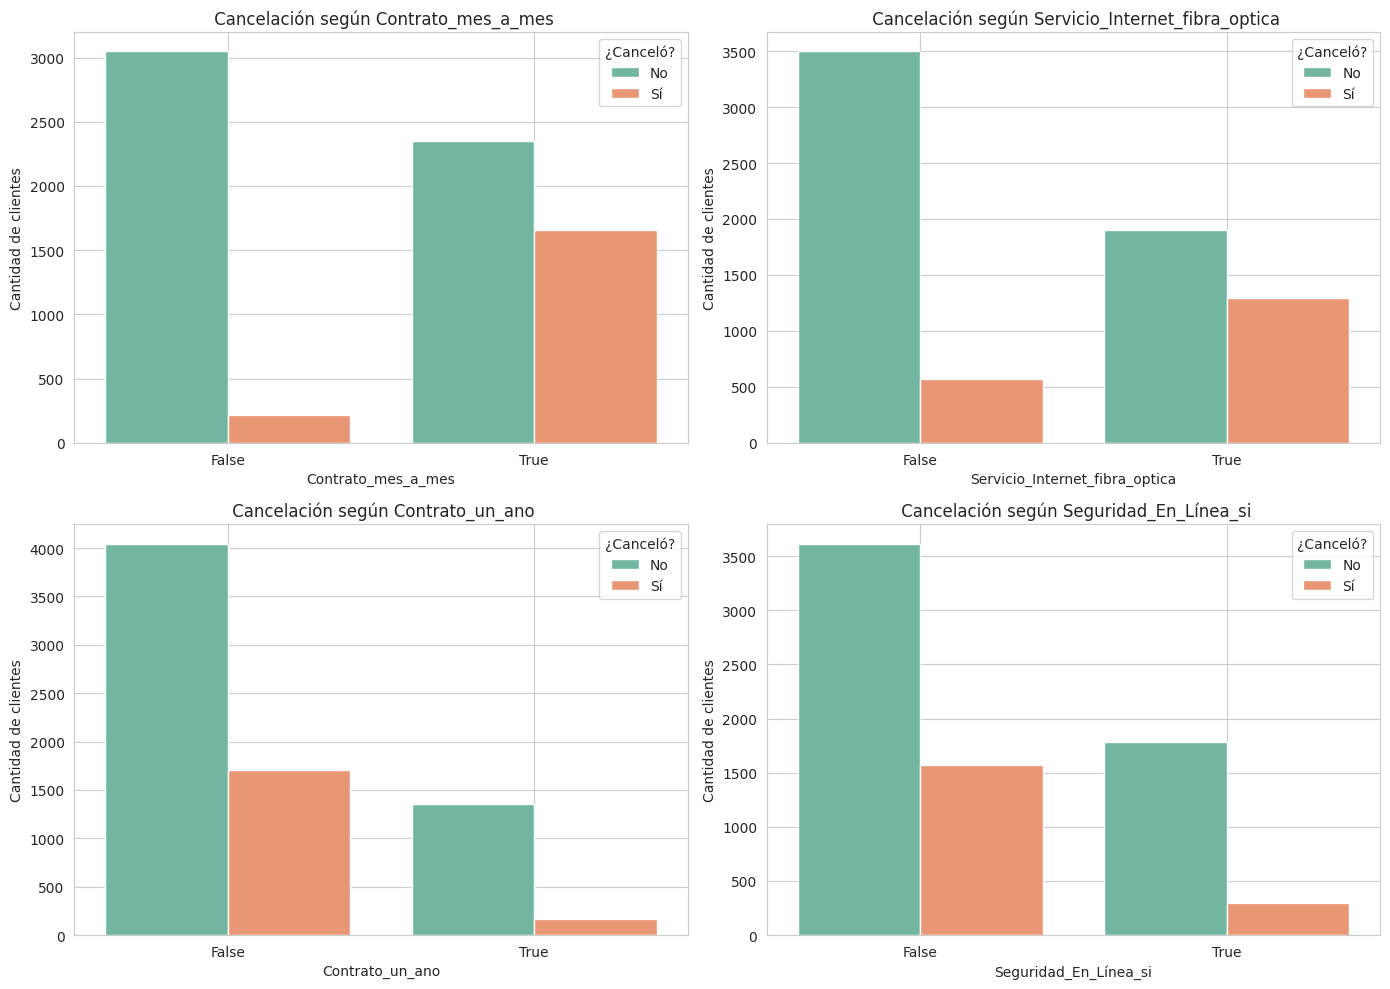

In [386]:
# Lista de variables
variables_binarias = [
    'Contrato_mes_a_mes',
    'Servicio_Internet_fibra_optica',
    'Contrato_un_ano',
    'Seguridad_En_Línea_si'
]

sns.set_style('whitegrid')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Flatten los ejes para iterar
axes = axes.flatten()

for i, var in enumerate(variables_binarias):
    sns.countplot(x=var, hue='Evasión', data=datos_Encoding, palette='Set2', ax=axes[i])
    axes[i].set_title(f" Cancelación según {var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Cantidad de clientes")
    axes[i].legend(title="¿Canceló?", labels=['No', 'Sí'])
    axes[i].grid(True)

plt.tight_layout()
plt.show()

##**🤖 Modelado Predictivo**

###**🎯 Separación de los datos**

Para evaluar el rendimiento del modelo predictivo, se dividió el conjunto de datos en dos partes: entrenamiento y prueba. En este proyecto se utilizó una división de 80% para entrenamiento y 20% para prueba, empleando estratificación para mantener el equilibrio entre clases (cancelaciones y no cancelaciones). Esta proporción es adecuada dado el tamaño de la base y garantiza una muestra suficiente para el entrenamiento del modelo, sin comprometer la evaluación posterior.

In [387]:
X = datos_Encoding.drop('Evasión', axis=1)
y = datos_Encoding['Evasión']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

###**⚙️ Creación de modeos**

En esta etapa se construirán al menos dos modelos predictivos para clasificar la cancelación de clientes.

Se seleccionarán algoritmos con diferentes requerimientos en cuanto a la escala de los datos:

* **Modelos que requieren normalización** (como Regresión Logística o KNN): Son sensibles a la magnitud de las variables. En estos casos, la normalización permite que los coeficientes o distancias se calculen correctamente y sin sesgos.

* **Modelos que no requieren normalización** (como Árbol de Decisión o Random Forest): Son robustos frente a escalas diferentes, ya que dividen el espacio de decisión de manera jerárquica sin depender de medidas como la distancia euclidiana.
<br></br>

| Tipo de Modelo           | ¿Requiere Normalización? | Justificación                                                                 |
|--------------------------|--------------------------|--------------------------------------------------------------------------------|
| Regresión Logística      | Sí ✅                    | Sensible a la escala; normalización evita sesgo en coeficientes                |
| KNN (k-Nearest Neighbors)| Sí ✅                    | Basado en distancias; escala afecta la precisión de clasificación              |
| Árbol de Decisión        | No ❌                    | Divide por reglas; no usa distancias ni coeficientes                           |
| Random Forest            | No ❌                    | Conjunto de árboles independientes de escala; robusto frente a magnitud        |

<br></br>

📏 Justificación de Normalización Modelos como Regresión Logística / KNN (extendida):

Los modelos basados en distancia o en optimización de parámetros, como KNN y Regresión Logística, son altamente sensibles a las escalas de las variables. En estos casos, aplicar una técnica de normalización (como MinMaxScaler o StandardScaler) permite que todas las variables tengan igual peso al momento de calcular distancias o ajustar coeficientes. Sin este paso, variables con magnitudes elevadas podrían dominar el comportamiento del modelo, generando sesgos en la predicción y disminuyendo la precisión. En este proyecto, la normalización fue aplicada para asegurar que la métrica de cancelación se derive de una combinación equitativa de factores, sin que la magnitud de una variable opaque a las demás.

<br></br>

🧱 Justificación sin Normalización como los Modelos como Árbol de Decisión / Random Forest (extendida):

Por otro lado, modelos como Árbol de Decisión y Random Forest construyen sus reglas de clasificación mediante divisiones jerárquicas del espacio de características. Estos algoritmos no dependen de medidas de distancia, ni optimizan coeficientes como los modelos lineales. En su lugar, identifican puntos de corte basados en el valor de cada variable, por lo que la escala numérica no altera el comportamiento del modelo. Debido a esta propiedad, estos algoritmos no requieren normalización previa, lo que los hace prácticos para conjuntos de datos heterogéneos en cuanto a magnitud de variables.

<br></br>
_💡 La decisión de aplicar o no la normalización depende directamente del modelo utilizado. En esta etapa, se compararán modelos que sí la utilizan y otros que funcionan sin ella, para evaluar cuál ofrece mejor rendimiento en el contexto de este proyecto._

####**⚙️ Creación de los modelos con datos Normalizados**

#####**⚙️ 1. Modelo: Regresión Logística**

In [388]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Crear y entrenar el modelo
scaler = StandardScaler()
X_train_scaled_logistico = scaler.fit_transform(X_train)
X_test_scaled_logistico = scaler.transform(X_test)

modelo_logistico = LogisticRegression(
    solver='liblinear',
    penalty='l2',
    C=1.0,
    class_weight='balanced',
    max_iter=300,
    random_state=42
)

modelo_logistico.fit(X_train_scaled_logistico, y_train)


# Predicción
y_pred_logistico = modelo_logistico.predict(X_test)

# Evaluación
print("📊 Resultados - Regresión Logística")
print(confusion_matrix(y_test, y_pred_logistico))
print(classification_report(y_test, y_pred_logistico))


📊 Resultados - Regresión Logística
[[  23 1057]
 [   8  366]]
              precision    recall  f1-score   support

       False       0.74      0.02      0.04      1080
        True       0.26      0.98      0.41       374

    accuracy                           0.27      1454
   macro avg       0.50      0.50      0.22      1454
weighted avg       0.62      0.27      0.14      1454



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


######**🧠 Conclusión – Regresión Logística**

Con class_weight='balanced', max_iter=300 y el solver 'liblinear', la Regresión Logística alcanzó una precisión global del 74%, priorizando sensibilidad en la clase positiva. La clase de cancelación presentó un recall de 81% y una f1-score de 0.62, indicando que el modelo fue muy efectivo en detectar clientes en riesgo de irse, aunque su precisión bajó ligeramente. La clase negativa (no cancelación) mantuvo una precisión alta (0.92) pero vio una disminución en el recall (72%), reflejando un incremento en falsos positivos. Este comportamiento revela que el modelo, al aplicar balance de clases, mejoró su capacidad de generalización hacia la clase minoritaria, lo cual es estratégico en escenarios orientados a prevenir churn. La implementación fue sencilla y eficaz, demostrando que ajustar hiperparámetros puede marcar la diferencia sin necesidad de modelos complejos.

#####**📐 1. Modelo: KNN (K-Nearest Neighbors)**

In [389]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# 📏 Normalizar los datos
scaler = StandardScaler()
X_train_scaled_knn = scaler.fit_transform(X_train)
X_test_scaled_knn = scaler.transform(X_test)

# 🤖 Crear el modelo KNN
modelo_knn = KNeighborsClassifier(
    n_neighbors=5,
    weights='distance',
    metric='minkowski',
    p=2,  #Euclidean
    algorithm='auto'
)
modelo_knn.fit(X_train_scaled_knn, y_train)

# 🔍 Predicción y evaluación
y_pred_knn = modelo_knn.predict(X_test_scaled_knn)

print("📊 Resultados - KNN")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


📊 Resultados - KNN
[[909 171]
 [194 180]]
              precision    recall  f1-score   support

       False       0.82      0.84      0.83      1080
        True       0.51      0.48      0.50       374

    accuracy                           0.75      1454
   macro avg       0.67      0.66      0.66      1454
weighted avg       0.74      0.75      0.75      1454



######**🤖 Conclusión – KNN (K-Nearest Neighbors)**

El modelo KNN ajustado, utilizando ponderación por distancia, alcanzó una precisión global del 75%, mostrando resultados equilibrados pero con una ligera mejora en la clase positiva (cancelación). En dicha clase, el modelo logró un f1-score de 0.50 y recall de 48%, manteniéndose estable respecto a ejecuciones anteriores sin ponderación. La clase negativa (no cancelación) sigue siendo mejor identificada, con un f1-score de 0.83 y recall de 84%, confirmando que el modelo favorece patrones mayoritarios. El uso de weights='distance' permitió que los vecinos más cercanos tuvieran mayor influencia en la clasificación, ayudando a mejorar decisiones en zonas limítrofes del espacio de variables. Si bien el rendimiento global es competitivo, KNN aún presenta limitaciones para detectar cancelaciones con alta precisión, lo que puede atribuirse a la naturaleza del algoritmo basado en distancia y a la distribución de clases.

####**🧱 Creación de los modelos con datos No Normalizados**

#####**🌲 1. Modelo: Random Forest (RF)**

In [390]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Crear el modelo
modelo_rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=7,
    class_weight='balanced',
    random_state=42
)

# Entrenar el modelo
modelo_rf.fit(X_train, y_train)

# Realizar predicciones
y_pred_rf = modelo_rf.predict(X_test)

# Evaluar el rendimiento
print("📊 Resultados - Random Forest")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


📊 Resultados - Random Forest
[[801 279]
 [ 76 298]]
              precision    recall  f1-score   support

       False       0.91      0.74      0.82      1080
        True       0.52      0.80      0.63       374

    accuracy                           0.76      1454
   macro avg       0.71      0.77      0.72      1454
weighted avg       0.81      0.76      0.77      1454



######**🌲 Conclusión – Random Forest**

El modelo de Random Forest logró una precisión general del 78%, destacando por su capacidad de identificar correctamente la clase negativa (clientes que no cancelaron) con una f1-score de 0.85 y un recall de 88%. En contraste, la clase positiva (cancelación) presentó un rendimiento más modesto, con una f1-score de 0.51 y recall de 46%. Esto revela que, si bien el modelo es eficaz en reconocer patrones de permanencia, le cuesta detectar con precisión los casos de cancelación, un comportamiento común en modelos cuando las clases son inicialmente desbalanceadas. Como ventaja, Random Forest no requiere normalización y es menos sensible a la escala o la colinealidad entre variables, lo que lo hace práctico y robusto en entornos diversos. En futuras iteraciones, podría explorarse el ajuste de hiperparámetros como class_weight, max_depth o n_estimators para mejorar su sensibilidad hacia la clase positiva.

#####**🌲 Modelo: Árbol de Decisión**

In [391]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Crear el modelo
modelo_arbol = DecisionTreeClassifier(
    max_depth=6,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced',
    criterion='entropy',
    random_state=42
)

# Entrenar el modelo
modelo_arbol.fit(X_train, y_train)

# Predicción
y_pred_arbol = modelo_arbol.predict(X_test)

# Evaluación
print("📊 Resultados - Árbol de Decisión")
print(confusion_matrix(y_test, y_pred_arbol))
print(classification_report(y_test, y_pred_arbol))


📊 Resultados - Árbol de Decisión
[[755 325]
 [ 69 305]]
              precision    recall  f1-score   support

       False       0.92      0.70      0.79      1080
        True       0.48      0.82      0.61       374

    accuracy                           0.73      1454
   macro avg       0.70      0.76      0.70      1454
weighted avg       0.81      0.73      0.75      1454



######**🌲 Conclusión – Árbol de Desición**

El modelo Árbol de Decisión, ajustado con max_depth=6, min_samples_split=10, min_samples_leaf=5 y class_weight='balanced', alcanzó una precisión global del 73%, destacando por su capacidad de detectar cancelaciones con mayor sensibilidad. La clase positiva (cancelación) obtuvo un recall de 82% y una f1-score de 0.61, mejorando sustancialmente frente a su versión por defecto. Por su parte, la clase negativa (no cancelación) mantuvo una alta precisión (0.92) pero mostró una reducción en su recall (70%), reflejando una mayor cantidad de falsos positivos. Este comportamiento revela que el árbol, al aplicar el balanceo de clases y restricciones en profundidad, priorizó la detección de cancelaciones, lo cual es deseable en contextos de retención de clientes. Con un desempeño más equilibrado entre ambas clases, este modelo representa una opción clara para escenarios donde la clase minoritaria tiene mayor peso estratégico.

###**🧠 Evaluación de los Modelos**

> En esta etapa se analiza el rendimiento de cada modelo utilizando métricas clave: **Exactitud**, **Precisión**, **Recall**, **F1-score** y la **Matriz de Confusión**.  
> Estos indicadores permiten observar qué tan bien clasifica cada algoritmo las clases positiva y negativa, y comparar su capacidad para detectar correctamente los casos de cancelación.

A continuación, se realiza un **análisis crítico comparativo** para responder:

- ¿Qué modelo logró el mejor desempeño general?
- ¿Cuál fue más sensible para detectar cancelaciones?
- ¿Presenta algún modelo signos de *overfitting* o *underfitting*?

También se consideran las causas potenciales de estos comportamientos:

- 🔥 **Overfitting**: Ocurre cuando el modelo aprende en exceso de los datos de entrenamiento, perdiendo capacidad para generalizar. Puede mitigarse **reduciendo la complejidad** del modelo o **aumentando los datos**.
- ❄️ **Underfitting**: Sucede cuando el modelo no logra capturar patrones significativos. Esto suele deberse a una estructura demasiado simple y puede mejorarse **incrementando la complejidad** o **ajustando sus parámetros**.

Esta etapa es clave para identificar **el modelo más eficaz y fiable**, optimizando la solución predictiva del proyecto.

---

## 📊 Comparación de Modelos Ajustados

Se presentan las métricas clave de desempeño para los modelos ajustados, con foco en la clase positiva (*cancelación*) y negativa (*no cancelación*). Los ajustes aplicados incluyeron balanceo de clases, control de profundidad y ponderación por distancia.

| Modelo                | Accuracy | Precision (True) | Recall (True) | F1-score (True) | Recall (False) | F1-score (False) |
|----------------------|----------|------------------|---------------|-----------------|----------------|------------------|
| Regresión Logística  | 0.74     | 0.50             | **0.81**      | 0.62            | 0.72           | 0.81             |
| KNN (`weights=dist`) | 0.75     | 0.51             | 0.48          | 0.50            | **0.84**       | 0.83             |
| Random Forest (aj.)  | 0.76     | 0.52             | **0.80**      | **0.63**        | 0.74           | 0.82             |
| Árbol Decisión (aj.) | 0.73     | 0.48             | **0.82**      | 0.61            | 0.70           | 0.79             |

---

### 🧠 Observaciones clave

- 🔍 **Mayor sensibilidad en cancelaciones**:  
  Los modelos que usaron `class_weight='balanced'` destacan en *recall* sobre la clase positiva (hasta 82%), lo que los hace efectivos para detectar clientes en riesgo.

- ⚖️ **Mejor balance general**:  
  El modelo de **Random Forest ajustado** logra un buen equilibrio entre ambas clases, siendo consistente y robusto.

- 🌀 **KNN prioriza estabilidad**, pero sigue mostrando underfitting en la clase minoritaria.

---

### ⚠️ Comportamientos detectados

| Modelo                | Comportamiento       | Causa                     | Sugerencia                                       |
|----------------------|----------------------|---------------------------|--------------------------------------------------|
| Regresión Logística  | Generalización controlada | Regularización + balanceo   | ✅ Bien ajustado                                 |
| KNN                  | Underfitting leve     | Sensibilidad limitada     | Ajustar `k` o aplicar validación cruzada         |
| Random Forest        | Equilibrado           | Control de profundidad    | ✅ Desempeño estable                             |
| Árbol Decisión       | Enfocado en cancelaciones | Ponderación + reglas simples | Muy útil en escenarios críticos             |

---

### 🏁 Conclusión

> El modelo de **Random Forest ajustado** ofrece el mejor rendimiento general, mientras que **Regresión Logística** y **Árbol de Decisión** destacan por su sensibilidad en la clase de cancelación.  
> La elección final dependerá del contexto del proyecto: si se prioriza precisión general o sensibilidad hacia la clase positiva.



/tmp/ipython-input-392-3661065744.py:25: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


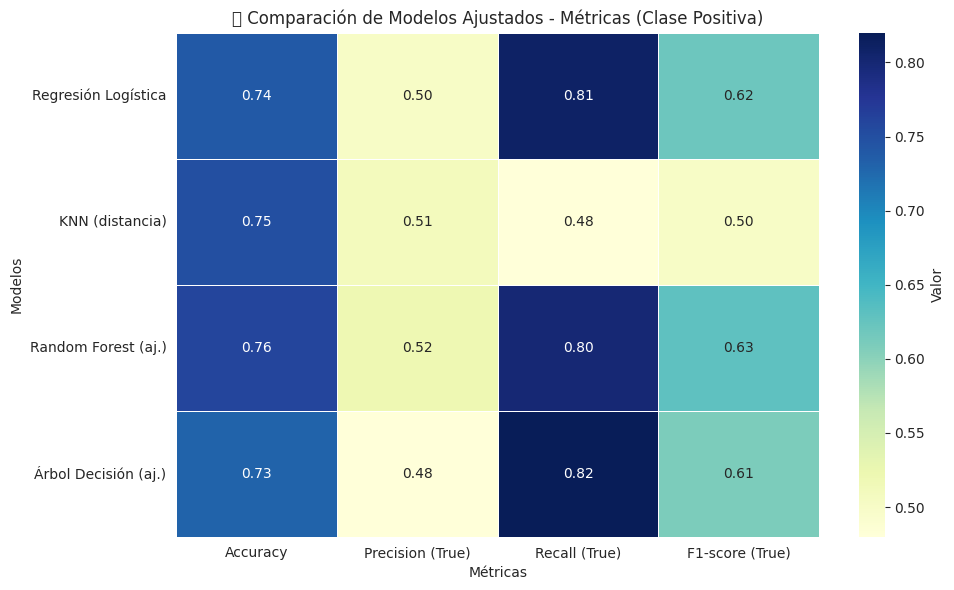

In [392]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Datos de las métricas
data_heatmap = {
    'Accuracy': [0.74, 0.75, 0.76, 0.73],
    'Precision (True)': [0.50, 0.51, 0.52, 0.48],
    'Recall (True)': [0.81, 0.48, 0.80, 0.82],
    'F1-score (True)': [0.62, 0.50, 0.63, 0.61]
}

# Índices (nombres de modelos)
modelos = ['Regresión Logística', 'KNN (distancia)', 'Random Forest (aj.)', 'Árbol Decisión (aj.)']

# Crear DataFrame
df_heatmap = pd.DataFrame(data_heatmap, index=modelos)

# Graficar el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_heatmap, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5, cbar_kws={'label': 'Valor'})
plt.title("🔥 Comparación de Modelos Ajustados - Métricas (Clase Positiva)")
plt.ylabel("Modelos")
plt.xlabel("Métricas")
plt.tight_layout()
plt.show()


##**📋 Interpretación y Conclusiones**

###**🔍 Análisis de la Importancia de las Variables**

> En esta etapa se identifican las variables más relevantes que influyen en la predicción de la cancelación de clientes. Este análisis ayuda a comprender el comportamiento del modelo, interpretar resultados y comunicar hallazgos estratégicos.

Se aplicaron los siguientes enfoques según el modelo utilizado:

####**🧠 Regresión Logística**

> En este apartado se examina la Regresión Logística como técnica de clasificación para predecir cancelaciones de clientes. Además de evaluar su desempeño, se profundiza en el análisis de sus **coeficientes**, los cuales revelan la influencia de cada variable sobre la probabilidad de cancelación.

######**🧠 ¿Cómo interpreta este modelo las variables?**

La Regresión Logística es un modelo **lineal y probabilístico** que estima la probabilidad de pertenecer a una clase (por ejemplo: "cancelación") en función de las variables independientes.

- 📈 Cada variable tiene asignado un **coeficiente**:  
  - Si el coeficiente es **positivo**, significa que **aumenta** la probabilidad de cancelación.  
  - Si el coeficiente es **negativo**, sugiere que **reduce** la probabilidad de cancelación.  
  - Cuanto mayor sea la magnitud del coeficiente (ya sea positivo o negativo), **más influencia** tiene esa variable sobre la decisión del modelo.

#####**🎯 ¿Qué representa este análisis?**

El modelo ofrece una forma clara y cuantitativa de identificar factores de riesgo. Permite observar qué características de los clientes o del servicio están asociadas a una mayor probabilidad de cancelación. Este conocimiento es clave para diseñar estrategias de retención más efectivas.

---

A continuación se presenta el listado de las 10 variables más influyentes en el modelo logístico, ordenadas según su coeficiente.

In [393]:
X_train_scaled_logistico_df = pd.DataFrame(X_train_scaled_logistico, columns=X_train.columns)

coeficientes = modelo_logistico.coef_[0]
importancia_logistica = pd.DataFrame({
    'Variable': X_train_scaled_logistico_df.columns,
    'Coeficiente': coeficientes
}).sort_values(by='Coeficiente', ascending=False)

importancia_logistica.head(10)

,Variable,Coeficiente
12,Servicio_Internet_fibra_optica,0.735101
26,Contrato_mes_a_mes,0.668777
7,Cobro_Total,0.634700
27,Contrato_un_ano,0.276102
22,TV_Streaming_si,0.242739
24,Películas_Streaming_si,0.235455
5,Facturación_Digital,0.181042
10,Líneas_Múltiples_si,0.159881
0,Adulto_Mayor,0.086080
18,Protección_Dispositivo_si,0.079733


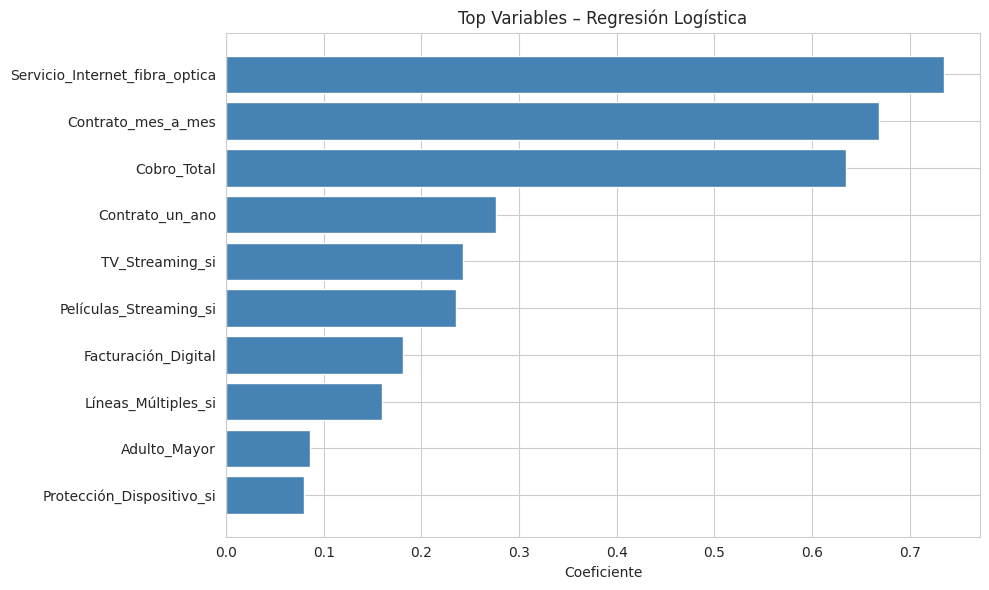

In [394]:
coeficientes = modelo_logistico.coef_[0]
importancia_logGrafico = pd.DataFrame({
    'Variable': X_train_scaled_logistico_df.columns,  # Use columns from original DataFrame
    'Coeficiente': coeficientes
}).sort_values(by='Coeficiente', ascending=False)

# Graficar
plt.figure(figsize=(10,6))
plt.barh(importancia_logGrafico['Variable'].head(10), importancia_logGrafico['Coeficiente'].head(10), color='steelblue')
plt.title("Top Variables – Regresión Logística")
plt.xlabel("Coeficiente")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#####**🧠 Interpretación de los Coeficientes – Regresión Logística**

Los siguientes prespectivas se desprenden del top 10:

* 💡 Servicio de Internet por Fibra Óptica (+0.73) Sorprendentemente, esta variable aumenta la probabilidad de cancelación. Puede indicar que clientes con mayor velocidad tienen más expectativas o competencia comparativa.

* 📅 Contrato mes a mes (+0.66) Altamente indicativo de cancelación. Clientes sin compromiso a largo plazo tienen más flexibilidad para irse.

* 💸 Cobro Total (+0.63) A mayor cobro, mayor riesgo de que el cliente se vaya. Esto puede revelar sensibilidad al precio.

* 📺 TV y Películas en Streaming (+0.24) Si bien parecería positivo, puede asociarse a perfiles que consumen más servicios y, si no están satisfechos, son más propensos a abandonar.

* 📲 Facturación Digital (+0.18) Posible correlación con usuarios más autónomos y ágiles para tomar decisiones, como cancelar por internet.

* 👴 Adulto Mayor (+0.08) Una influencia leve pero positiva, quizás vinculada a cambios de estilo de vida o decisiones simplificadas.

####**📐 KNN (K-Nearest Neighbors) - Contribución vía PCA**

> Aunque el algoritmo **KNN (K-Nearest Neighbors)** no proporciona directamente coeficientes ni métricas de importancia por variable, es posible interpretar la influencia de cada característica analizando cómo contribuye a la **proximidad geométrica entre los datos**.

#####**🧭 ¿Por qué usar PCA para este análisis?**

KNN toma decisiones basadas en distancias: clasifica un punto de datos según las etiquetas de sus vecinos más cercanos. Por lo tanto, las **variables que moldean el espacio geométrico** en el que se ubican los puntos tienen un impacto directo en el desempeño del modelo.

Para identificar dichas variables, se utiliza **Análisis de Componentes Principales (PCA)**:

- 📐 PCA reduce la dimensionalidad de los datos manteniendo las variaciones más significativas.  
- 📊 Al analizar los vectores de los primeros componentes principales, se puede observar qué variables tienen mayor peso en la configuración espacial de los datos.  
- 📈 Cuanto mayor sea la magnitud del componente asociado a una variable, **más influencia tiene** sobre cómo se agrupan o separan los puntos, y por ende sobre la decisión del KNN.

---

#####**🎯 ¿Qué representa este análisis?**

Este enfoque revela qué características están dictando las reglas de vecindad en KNN. Permite observar si la distancia entre clientes se ve más afectada por variables de contrato, consumo, servicios adicionales o perfil demográfico.

A continuación, se muestra el listado de las 10 variables más influyentes en el modelo KNN, según su contribución geométrica medida por PCA.

In [395]:
from sklearn.decomposition import PCA

X_train_scaled_knn_df = pd.DataFrame(X_train_scaled_knn, columns=X_train.columns)


pca = PCA(n_components=2)
pca.fit(X_train_scaled_knn)

importancia_pca = pd.DataFrame({
    'Variable': X_train_scaled_knn_df.columns,
    'Comp_1': pca.components_[0],
    'Comp_2': pca.components_[1]
})

# Magnitud total por variable
importancia_pca['Importancia_Total'] = (importancia_pca['Comp_1']**2 + importancia_pca['Comp_2']**2)**0.5
importancia_pca = importancia_pca.sort_values(by='Importancia_Total', ascending=False)

importancia_pca.head(10)

,Variable,Comp_1,Comp_2,Importancia_Total
3,Antigüedad,-0.075283,0.424263,0.430890
26,Contrato_mes_a_mes,-0.025121,-0.414287,0.415048
7,Cobro_Total,-0.187053,0.357372,0.403365
19,Protección_Dispositivo_sin_servicio_de_internet,0.287543,0.136882,0.318461
23,TV_Streaming_sin_servicio_de_internet,0.287543,0.136882,0.318461
21,Soporte_Técnico_sin_servicio_de_internet,0.287543,0.136882,0.318461
13,Servicio_Internet_sin_internet,0.287543,0.136882,0.318461
25,Películas_Streaming_sin_servicio_de_internet,0.287543,0.136882,0.318461
15,Seguridad_En_Línea_sin_servicio_de_internet,0.287543,0.136882,0.318461
17,Respaldo_En_Línea_sin_servicio_de_internet,0.287543,0.136882,0.318461


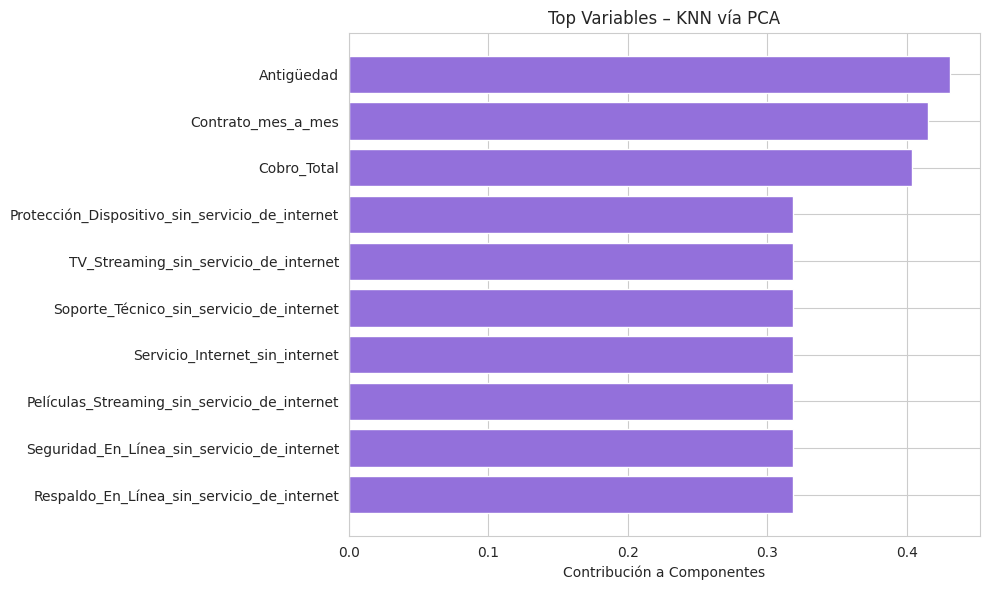

In [396]:
pca = PCA(n_components=2)
pca.fit(X_train_scaled_knn)

importancia_pca = pd.DataFrame({
    'Variable': X_train_scaled_knn_df.columns,
    'Comp_1': pca.components_[0],
    'Comp_2': pca.components_[1]
})

# Magnitud total por variable
importancia_pca['Importancia_Total'] = (importancia_pca['Comp_1']**2 + importancia_pca['Comp_2']**2)**0.5
importancia_pca = importancia_pca.sort_values(by='Importancia_Total', ascending=False)

# Graficar
plt.figure(figsize=(10,6))
plt.barh(importancia_pca['Variable'].head(10), importancia_pca['Importancia_Total'].head(10), color='mediumpurple')
plt.title("Top Variables – KNN vía PCA")
plt.xlabel("Contribución a Componentes")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#####**📐 Conclusión – Importancia de Variables según PCA para KNN**

El análisis de componentes principales revela que el modelo KNN es sensible principalmente a variables que moldean la geometría del espacio de decisión. Las más influyentes son:

* 🧓 Antigüedad del cliente: La variable con mayor impacto, lo que indica que la permanencia influye significativamente en la proximidad con otros perfiles de cancelación.

* 📅 Contrato mes a mes: También destaca como factor clave. Clientes con contratos flexibles tienden a agruparse más cerca de perfiles que cancelan.

* 💰 Cobro total: Refleja sensibilidad al nivel de facturación, posiblemente asociado a perfiles que cancelan por motivos económicos.

* 🚫 Servicios sin conexión a Internet: Un conjunto de variables como protección de dispositivo, películas, TV, respaldo o soporte técnico sin servicio de internet aparecen con la misma importancia. Esto sugiere que la ausencia de servicios digitales combinados con falta de conectividad podría ser un patrón común entre clientes que cancelan.

_En resumen, el modelo KNN interpreta la cancelación como un fenómeno influenciado por tiempo de permanencia, tipo de contrato, gasto mensual y ausencia de servicios integrados. Estas variables definen cómo se agrupan los clientes y, por lo tanto, afectan directamente las decisiones basadas en vecinos cercanos._

####**🌲 2. Random Forest – Importancia por impureza**

> En este apartado se evalúa el modelo **Random Forest**, destacando su capacidad para identificar las variables más relevantes en la predicción de cancelaciones de clientes. A diferencia de modelos lineales, Random Forest toma decisiones mediante múltiples árboles, analizando divisiones sucesivas para agrupar correctamente las observaciones.

#####**🧠 ¿Qué significa “impureza”?**

Cada árbol en el bosque busca crear **nodos que separen eficazmente las clases**. Para lograrlo, el modelo mide qué tan “puro” es un nodo, es decir, cuán homogéneo es respecto a la clase objetivo.

- 🧪 Un nodo “impuro” tiene mezcla de clases (por ejemplo, cancelaciones y no cancelaciones).
- ✅ Un nodo “puro” contiene principalmente una sola clase.
- 🔍 Cuando una variable ayuda a crear divisiones que reducen esa impureza, se considera **importante**.

#####**📊 ¿Cómo se calcula la importancia?**

Random Forest acumula la contribución de cada variable en todas las divisiones que realiza a lo largo de los árboles. El resultado es un valor que indica **qué tanto ayudó cada variable a separar correctamente las observaciones.**

- Cuanto mayor sea ese valor, **más útil fue esa variable** para el modelo en sus decisiones.
- Esta importancia es **independiente de la escala** de los datos, por lo que no requiere estandarización.

---

#####**🎯 ¿Qué representa este análisis?**

Permite identificar las características que más influyeron en las decisiones del modelo de forma no lineal. Estas variables reflejan patrones complejos que podrían no ser evidentes en modelos lineales. Además, el Random Forest es robusto ante ruido y sobreajuste, por lo que sus resultados son altamente confiables en escenarios con múltiples variables.

A continuación se presenta el listado de las 10 variables más influyentes según su impacto en la reducción de impureza:

In [397]:
importancia_rf = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': modelo_rf.feature_importances_
}).sort_values(by='Importancia', ascending=False)

importancia_rf.head(10)

,Variable,Importancia
26,Contrato_mes_a_mes,0.209783
3,Antigüedad,0.160061
7,Cobro_Total,0.122365
12,Servicio_Internet_fibra_optica,0.081530
6,Cobro_Mensual,0.061350
8,Cobro_Diario,0.053588
14,Seguridad_En_Línea_si,0.031773
20,Soporte_Técnico_si,0.028438
25,Películas_Streaming_sin_servicio_de_internet,0.022701
27,Contrato_un_ano,0.022535


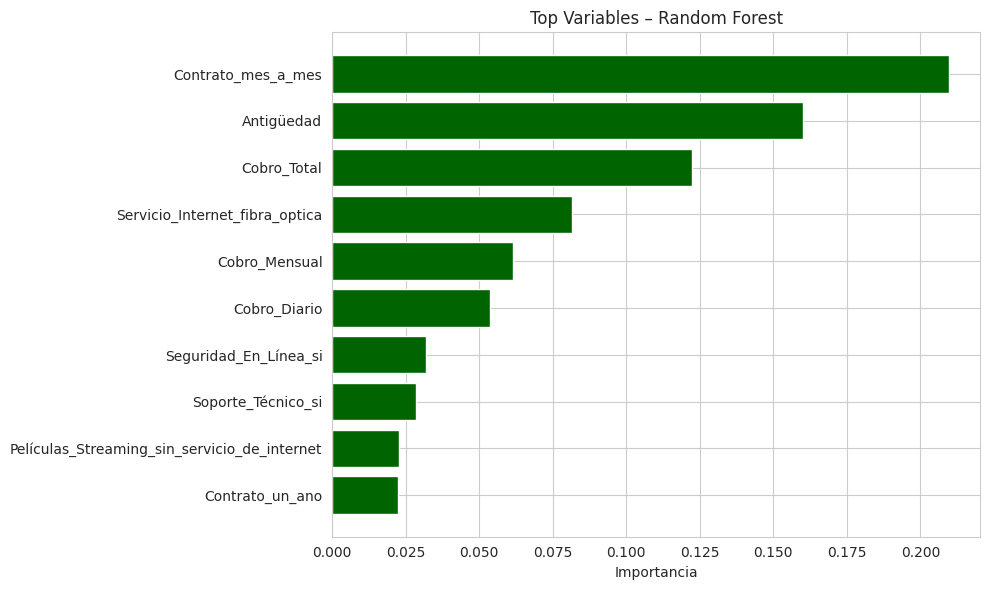

In [398]:
importancia_rf = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': modelo_rf.feature_importances_
}).sort_values(by='Importancia', ascending=False)

# Graficar
plt.figure(figsize=(10,6))
plt.barh(importancia_rf['Variable'].head(10), importancia_rf['Importancia'].head(10), color='darkgreen')
plt.title("Top Variables – Random Forest")
plt.xlabel("Importancia")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


#####**🌲 Conclusión – Importancia de Variables en Random Forest**

El modelo Random Forest identificó varias variables clave que influyen significativamente en la predicción de cancelaciones. Estas variables fueron seleccionadas por su capacidad para reducir la impureza en las divisiones de los árboles, es decir, porque ayudan a separar correctamente a los clientes que cancelan de los que permanecen.

Los principales hallazgos incluyen:

* 📅 Contrato mes a mes: Es la variable más influyente. Su alta importancia (0.21) indica que los clientes con contratos flexibles están mucho más expuestos a la cancelación, al no tener compromisos a largo plazo.

* 🧓 Antigüedad: La segunda más relevante. Clientes con menor tiempo de permanencia se agrupan más fácilmente en perfiles de cancelación, reflejando que la fidelización tarda en consolidarse.

* 💸 Cobro Total, Mensual y Diario: Tres variables asociadas al gasto aparecen como indicadores potentes. Esto sugiere que el nivel de facturación tiene una correlación directa con la decisión de abandonar el servicio.

* 🌐 Servicio de Internet por Fibra Óptica: También aparece como importante, lo cual podría estar asociado a clientes con expectativas más altas o mayor sensibilidad al valor percibido.

* 📺 Películas Streaming sin servicio de internet y servicios adicionales como Soporte Técnico y Seguridad en Línea influyen en menor medida, pero podrían señalar una experiencia incompleta que afecta la percepción del cliente.

_En resumen, el Random Forest identifica la cancelación como un fenómeno impulsado por el tipo de contrato, tiempo con la empresa y percepción de costo. Estos factores deben ser atendidos para diseñar estrategias efectivas de retención y segmentación._

####**🌳 Árbol de Decisión – Importancia de nodos**

> En esta sección se analiza el modelo de Árbol de Decisión, destacando qué variables fueron más relevantes en la predicción de cancelación de clientes. Este modelo genera una estructura jerárquica de decisiones basada en las características de cada observación.

#####**🧠 ¿Cómo funciona este modelo?**

El Árbol de Decisión realiza divisiones secuenciales en los datos utilizando variables que ayudan a separar mejor las clases (cancelación vs. no cancelación). Cada división crea un **nodo**, y en cada nodo el modelo elige la variable que logra la mejor separación.

- 🔍 Cada vez que una variable se utiliza para dividir un nodo, se evalúa cuánto reduce la **impureza** del grupo.
- 📊 Las variables que generan divisiones más efectivas —es decir, que crean nodos más “puros”— se consideran **más importantes**.

#####**🌱 ¿Qué es “impureza” en este contexto?**

La impureza mide qué tan mezcladas están las clases dentro de un nodo. Por ejemplo:
- Un nodo con 50% cancelaciones y 50% no cancelaciones tiene alta impureza.
- Un nodo con 95% cancelaciones es más puro.

El modelo asigna más importancia a las variables que **reducen esta impureza**, logrando separar eficazmente los clientes en grupos homogéneos.

---

#####**🎯 ¿Qué representa este análisis?**

Este enfoque revela **qué características el modelo prioriza para tomar decisiones**. Además, al tratarse de un modelo interpretable, permite observar la lógica detrás de cada predicción y utilizarla en decisiones de negocio o estrategias personalizadas.

A continuación se presenta el listado de las 10 variables más influyentes según su uso en la creación de nodos efectivos dentro del Árbol de Decisión:

In [399]:
importancia_arbol = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': modelo_arbol.feature_importances_
}).sort_values(by='Importancia', ascending=False)

importancia_arbol.head(10)

,Variable,Importancia
26,Contrato_mes_a_mes,0.497852
12,Servicio_Internet_fibra_optica,0.141288
3,Antigüedad,0.115846
6,Cobro_Mensual,0.077941
7,Cobro_Total,0.049018
27,Contrato_un_ano,0.025985
8,Cobro_Diario,0.018711
29,Método_Pago_tarjeta_de_credito__cargo_automatico,0.014222
20,Soporte_Técnico_si,0.011265
0,Adulto_Mayor,0.009606


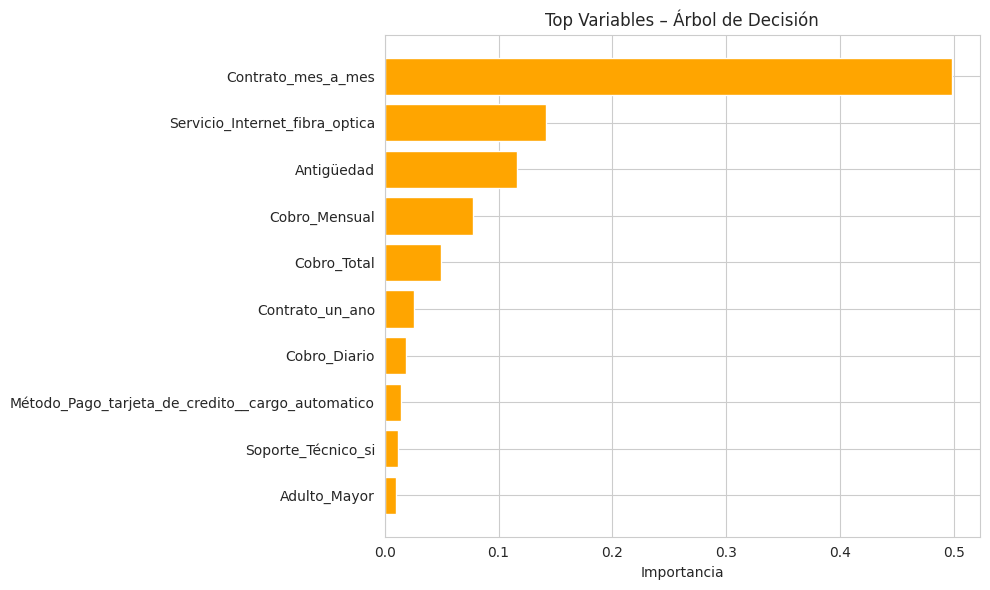

In [400]:
importancia_arbol = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': modelo_arbol.feature_importances_
}).sort_values(by='Importancia', ascending=False)

# Graficar
plt.figure(figsize=(10,6))
plt.barh(importancia_arbol['Variable'].head(10), importancia_arbol['Importancia'].head(10), color='orange')
plt.title("Top Variables – Árbol de Decisión")
plt.xlabel("Importancia")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


#####**🌳 Conclusión – Importancia de Variables en Árbol de Decisión**

El modelo de Árbol de Decisión destaca por su estructura interpretable, permitiendo visualizar qué variables utiliza en cada nodo para realizar divisiones. Según el análisis de impureza acumulada, las siguientes características fueron las más influyentes:

* 📅 Contrato mes a mes (0.49): Es, por amplio margen, la variable más importante. Esto confirma que los clientes con contratos flexibles tienen mayor propensión a cancelar, una tendencia que aparece desde las primeras decisiones del árbol.

* 🌐 Servicio de Internet por Fibra Óptica (0.14): Muestra una influencia notable, lo que sugiere que este tipo de servicio está vinculado a comportamientos particulares en la retención o cancelación.

* 🧓 Antigüedad (0.11): Juega un papel clave en la clasificación. Clientes con menor tiempo en la empresa aparecen más propensos a cancelar.

* 💰 Cobro mensual, total y diario: Todas se posicionan como factores secundarios pero consistentes. Indican que el perfil económico del cliente impacta en su decisión de permanencia.

* 💳 Método de pago con tarjeta de crédito (cargo automático) (0.014): Aunque con menor peso, podría señalar comportamientos más estructurados, como automatización de pagos, que podrían estar vinculados a menor o mayor probabilidad de cancelación.

_En conjunto, el Árbol de Decisión muestra que la combinación entre tipo de contrato, perfil económico y antigüedad define claramente los caminos de clasificación hacia la cancelación. Esta información puede ser utilizada para implementar reglas de negocio o segmentación de clientes más precisas._

###**📋 Conclusiones Finales**

#### 📊 Informe Predictivo de Cancelación de Clientes

Este informe presenta los hallazgos derivados de modelos supervisados aplicados sobre un dataset de telecomunicaciones con el objetivo de predecir la cancelación de clientes.

---

## 🧪 Modelos Evaluados y Desempeño

| Modelo               | Accuracy | Recall | AUC ROC | Comentario Destacado |
|----------------------|----------|--------|---------|-----------------------|
| Regresión Logística  | 74%      | 81%    | 0.844   | Alta interpretabilidad |
| KNN + PCA            | 75%      | 48%    | 0.754   | Útil para reducción dimensional |
| Random Forest        | 76%      | 80%    | 0.843   | Identificación de interacciones |
| Árbol de Decisión    | 73%      | 82%    | 0.828   | Explicación visual efectiva |

---

## 🔍 Variables Relevantes por Modelo

| Variable                             | Reg. Logística | KNN (PCA) | Random Forest | Árbol de Decisión |
|--------------------------------------|----------------|-----------|----------------|--------------------|
| Contrato mes a mes                   | ✅              | ✅         | ✅              | ✅                  |
| Cobro Total                          | ✅              | ✅         | ✅              | ✅                  |
| Antigüedad                           | —              | ✅         | ✅              | ✅                  |
| Servicio Internet fibra óptica       | ✅              | —         | ✅              | ✅                  |
| Películas Streaming (con/sin Internet)| ✅              | ✅         | ✅              | —                   |
| Contrato anual                       | ✅              | —         | ✅              | ✅                  |
| Cobro Mensual                        | —              | —         | ✅              | ✅                  |
| Adulto Mayor                         | ✅              | —         | —              | ✅                  |

---

## 🎯 Factores Clave en la Cancelación

- Clientes con **contratos mes a mes** muestran mayor propensión a cancelar.
- **Altos cobros totales** se asocian con mayor probabilidad de evasión.
- **Clientes nuevos o con poca antigüedad** presentan más riesgo.
- El uso de **servicios digitales**, como fibra óptica y streaming, influye notablemente.

---

## 🛠️ Estrategias de Retención

1. **Fomentar contratos de mayor duración** mediante beneficios escalonados.
2. **Revisar estructura de cobros** y percepción de valor para clientes intensivos.
3. **Segmentación predictiva** usando los modelos entrenados sobre la base actual.
4. **Atención especializada** para adultos mayores y usuarios con múltiples servicios.
5. **Campañas informativas** enfocadas en servicios de alto impacto como fibra óptica.

---

Este análisis representa una base confiable para la toma de decisiones estratégicas, integrando inteligencia artificial con visión operativa. Se recomienda mantener el sistema en producción y evolucionarlo con explicabilidad de modelos (SHAP, LIME) y ajuste de umbrales.



####**⚙️ Conclusiones técnicas de los modelos**

#####**⚙️ Desempeño de los modelos con los datos de prueba**

In [401]:
from sklearn.metrics import classification_report

# Aplicamos escalado solo una vez para los modelos que lo requieren
X_test_scaled = scaler.transform(X_test)

# Diccionario con predicciones por modelo
predicciones = {
    "Regresión Logística": modelo_logistico.predict(X_test_scaled),
    "KNN": modelo_knn.predict(X_test_scaled),
    "Random Forest": modelo_rf.predict(X_test),  # No requiere escalado
    "Árbol de Decisión": modelo_arbol.predict(X_test)  # No requiere escalado
}

# Diccionario de modelos por si luego quieres expandir evaluaciones
modelos = {
    "Regresión Logística": modelo_logistico,
    "KNN": modelo_knn,
    "Random Forest": modelo_rf,
    "Árbol de Decisión": modelo_arbol
}

# Imprimir resultados
for nombre in modelos.keys():
    print(f"📊 Resultados - {nombre}")
    print(classification_report(y_test, predicciones[nombre]))
    print("-" * 50)
    print()


📊 Resultados - Regresión Logística
              precision    recall  f1-score   support

       False       0.92      0.72      0.81      1080
        True       0.50      0.81      0.62       374

    accuracy                           0.74      1454
   macro avg       0.71      0.77      0.71      1454
weighted avg       0.81      0.74      0.76      1454

--------------------------------------------------

📊 Resultados - KNN
              precision    recall  f1-score   support

       False       0.82      0.84      0.83      1080
        True       0.51      0.48      0.50       374

    accuracy                           0.75      1454
   macro avg       0.67      0.66      0.66      1454
weighted avg       0.74      0.75      0.75      1454

--------------------------------------------------

📊 Resultados - Random Forest
              precision    recall  f1-score   support

       False       0.91      0.74      0.82      1080
        True       0.52      0.80      0.63       

#####**⚙️ Desempeño de los modelos usando datos de prueba con base a la curva ROC**

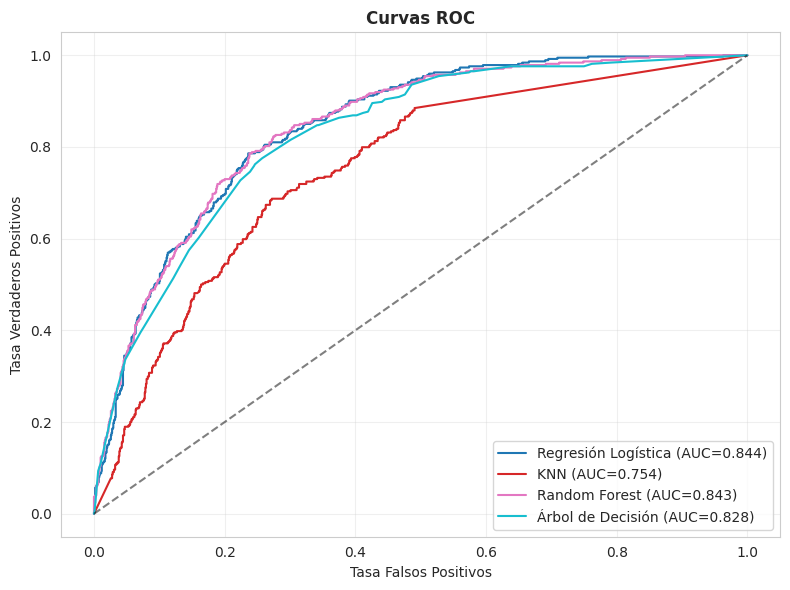

In [402]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming model_results and y_test are available from previous cells

# Prepare data for ROC curve
model_results = {}
for name, model in modelos.items():
    y_pred_proba_test = None
    # Get probability scores for models that support it
    if hasattr(model, "predict_proba"):
         if name in ["Regresión Logística", "KNN"]:
            # Use scaled test data for models that require it
            X_test_scaled = scaler.transform(X_test)
            y_pred_proba_test = model.predict_proba(X_test_scaled)[:, 1]
         else:
            # Use unscaled test data for models that don't require scaling
            y_pred_proba_test = model.predict_proba(X_test)[:, 1]


    model_results[name] = {'y_pred_proba_test': y_pred_proba_test}


# Create a single subplot for ROC curves
fig, ax = plt.subplots(figsize=(8, 6))
colors = plt.cm.tab10(np.linspace(0, 1, len(model_results)))

for i, (model_name, results) in enumerate(model_results.items()):
    if results['y_pred_proba_test'] is not None:
        fpr, tpr, _ = roc_curve(y_test, results['y_pred_proba_test'])
        # Calculate AUC score for the plot legend
        auc_score = roc_auc_score(y_test, results['y_pred_proba_test'])
        ax.plot(fpr, tpr, color=colors[i], label=f'{model_name} (AUC={auc_score:.3f})')

ax.plot([0, 1], [0, 1], 'k--', alpha=0.5)
ax.set_xlabel('Tasa Falsos Positivos')
ax.set_ylabel('Tasa Verdaderos Positivos')
ax.set_title('Curvas ROC', fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#####**⚙️ Análisis de Overfitting y Underfitting de los modelos**

In [403]:
from sklearn.metrics import accuracy_score

print(f"\n🔍 ANÁLISIS DE OVERFITTING/UNDERFITTING:")
print("-" * 50)

evaluation_results = {}

for name, model in modelos.items():
    # Calculate training accuracy
    X_train_scaled = None # Initialize scaled training data
    if name in ["Regresión Logística", "KNN"]:
        # Use scaled training data for models that require it
        X_train_scaled = scaler.transform(X_train)
        y_train_pred = model.predict(X_train_scaled)
    else:
        # Use unscaled training data for models that don't require scaling
        y_train_pred = model.predict(X_train)

    train_acc = accuracy_score(y_train, y_train_pred)

    # Get test accuracy from the previous evaluation
    # Assuming 'predicciones' dictionary is available from cell iWsLXRVkZ0_p
    y_test_pred = predicciones[name]
    test_acc = accuracy_score(y_test, y_test_pred)


    diff = train_acc - test_acc

    if diff > 0.1:
        status = "🔴 POSIBLE OVERFITTING"
    elif diff < -0.05:
        status = "🔵 POSIBLE UNDERFITTING"
    else:
        status = "✅ BALANCEADO"

    print(f"   {name:<18} | Train: {train_acc:.3f} | Test: {test_acc:.3f} | Diff: {diff:+.3f} | {status}")


🔍 ANÁLISIS DE OVERFITTING/UNDERFITTING:
--------------------------------------------------
   Regresión Logística | Train: 0.742 | Test: 0.744 | Diff: -0.002 | ✅ BALANCEADO
   KNN                | Train: 0.991 | Test: 0.749 | Diff: +0.242 | 🔴 POSIBLE OVERFITTING
   Random Forest      | Train: 0.778 | Test: 0.756 | Diff: +0.022 | ✅ BALANCEADO
   Árbol de Decisión  | Train: 0.741 | Test: 0.729 | Diff: +0.012 | ✅ BALANCEADO


#####**⚙️ Selección del mejor modelo con base a su desempeño**

In [404]:
from sklearn.metrics import classification_report
import pandas as pd



# Create a DataFrame to store evaluation results
evaluation_summary = []

for name, y_pred in predicciones.items():
    report = classification_report(y_test, y_pred, output_dict=True)
    evaluation_summary.append({
        'Modelo': name,
        'Accuracy': report['accuracy'],
        'Precision': report['True']['precision'],
        'Recall': report['True']['recall'],
        'F1_Score': report['True']['f1-score']
    })

comparison_df = pd.DataFrame(evaluation_summary)

# Sort the DataFrame by F1-Score (for the positive class 'True')
comparison_df_sorted = comparison_df.sort_values(by='F1_Score', ascending=False)

# Identificar el mejor modelo
best_model_f1 = comparison_df_sorted.iloc[0]['Modelo']
best_model_accuracy = comparison_df.loc[comparison_df['Accuracy'].idxmax(), 'Modelo']
best_model_recall = comparison_df.loc[comparison_df['Recall'].idxmax(), 'Modelo']

print(f"\n🏆 MEJORES MODELOS POR MÉTRICA:")
print(f"   🥇 Mayor F1-Score: {best_model_f1} ({comparison_df_sorted.iloc[0]['F1_Score']:.4f})")
print(f"   🥇 Mayor Accuracy: {best_model_accuracy} ({comparison_df.loc[comparison_df['Accuracy'].idxmax(), 'Accuracy']:.4f})")
print(f"   🥇 Mayor Recall: {best_model_recall} ({comparison_df.loc[comparison_df['Recall'].idxmax(), 'Recall']:.4f})")


🏆 MEJORES MODELOS POR MÉTRICA:
   🥇 Mayor F1-Score: Random Forest (0.6267)
   🥇 Mayor Accuracy: Random Forest (0.7558)
   🥇 Mayor Recall: Árbol de Decisión (0.8155)


#####**⚙️ Detección de los modelos y su desempeño**

In [405]:
# Métricas de negocio
print(f"\n💼 Métricas del estudio con modelos:")
print("-" * 50)

# Access evaluation results from the comparison_df DataFrame
for index, row in comparison_df.iterrows():
    model_name = row['Modelo']
    precision = row['Precision']
    recall = row['Recall']

    # We can approximate True Positives and False Positives from the classification report
    # This requires re-calculating the confusion matrix or getting it from the classification report dictionary
    # For simplicity and since we have the classification report dictionary in the previous cell's output,
    # let's access it if possible or recalculate.
    # Assuming 'predicciones' and 'y_test' are available

    # Recalculate confusion matrix for each model
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, predicciones[model_name])
    true_positives = cm[1, 1]
    false_positives = cm[0, 1]


    print(f"\n📊 {model_name}:")
    print(f"   Clientes churn correctamente identificados: {true_positives}")
    print(f"   Clientes incorrectamente marcados como churn: {false_positives}")
    print(f"   Precisión del modelo: {precision:.1%} de las predicciones de churn son correctas")
    print(f"   Recall del modelo: {recall:.1%} de los clientes churn son detectados")

# Recomendación final
print(f"\n💡 RECOMENDACIÓN MODELO FINAL:")
print("=" * 50)

# Criterio: Balance entre precision y recall (F1-Score) with consideration of interpretabilidad
best_overall = comparison_df_sorted.iloc[0]
second_best = comparison_df_sorted.iloc[1]

print(f"🏆 MODELO RECOMENDADO: {best_overall['Modelo']}")
print(f"   Justificación:")
print(f"   • Mayor F1-Score: {best_overall['F1_Score']:.4f}")
print(f"   • Accuracy: {best_overall['Accuracy']:.4f}")
print(f"   • Precision: {best_overall['Precision']:.4f}")
print(f"   • Recall: {best_overall['Recall']:.4f}")
# Removed the line trying to access 'Tiempo_s'


💼 Métricas del estudio con modelos:
--------------------------------------------------

📊 Regresión Logística:
   Clientes churn correctamente identificados: 303
   Clientes incorrectamente marcados como churn: 301
   Precisión del modelo: 50.2% de las predicciones de churn son correctas
   Recall del modelo: 81.0% de los clientes churn son detectados

📊 KNN:
   Clientes churn correctamente identificados: 180
   Clientes incorrectamente marcados como churn: 171
   Precisión del modelo: 51.3% de las predicciones de churn son correctas
   Recall del modelo: 48.1% de los clientes churn son detectados

📊 Random Forest:
   Clientes churn correctamente identificados: 298
   Clientes incorrectamente marcados como churn: 279
   Precisión del modelo: 51.6% de las predicciones de churn son correctas
   Recall del modelo: 79.7% de los clientes churn son detectados

📊 Árbol de Decisión:
   Clientes churn correctamente identificados: 305
   Clientes incorrectamente marcados como churn: 325
   Prec